<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

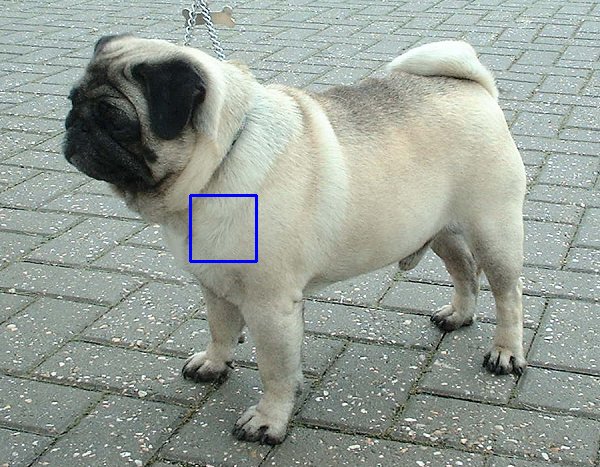

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import requests
from io import BytesIO

# Use a reliable JPG image
url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg"

# Download image content
response = requests.get(url)
try:
    img = Image.open(BytesIO(response.content)).convert('RGB')
except Exception as e:
    print("Error loading image:", e)
    raise

# Convert to NumPy array
img = np.array(img)
img_cv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img_cv, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the result
cv2_imshow(img_cv)
